In [1]:
# Koden har som input en Dictionary där Keys är Enzym och deras values är listor av deras substrat redan i smiles

#imput 
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import itertools
import pandas as pd
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Fingerprints import FingerprintMols
import pylab

dd = {'Enzym1': ["C[C@@H](C(=O)[O-])O" , "[O-]C(=O)C(O)CCCCCCCCCC" , "C[C@@H](C(=O)[O-])O"], 
      'Enzym2': ["CCCC[C@@H](C(=O)[O-])O" , "CCCCCCCCCCCCCCC(C(=O)[O-])O" , "C[C@@H](C(=O)[O-])O"]} # Exempel
# alt sätt input till dd

for key in dd: # Här loopas enzymen
    morgan = []
    maccs = []
    topological = []
    
    morganpairs = []
    maccspairs = []
    topologicalpairs = []
    
    
    for i in dd[key]: # Här loopas enzymens substrat och gör den till fp
        mol=Chem.MolFromSmiles(i)
        
        morgan.append(AllChem.GetMorganFingerprintAsBitVect(mol,5))
        
        maccs.append(MACCSkeys.GenMACCSKeys(mol))
        
        topological.append(FingerprintMols.FingerprintMol(mol))
        
        
    for x,y in itertools.combinations(morgan, 2):   # Här blir fp pairwise scores av olika slag
        morganpairs.append(DataStructs.FingerprintSimilarity(x, y))
        
    for x,y in itertools.combinations(maccs, 2):
        maccspairs.append(DataStructs.FingerprintSimilarity(x, y))
    
    for x,y in itertools.combinations(topological, 2):
        topologicalpairs.append(DataStructs.FingerprintSimilarity(x, y))
        
    morgan_avg = sum(morganpairs) / len(morganpairs)
    maccs_avg = sum(maccspairs) / len(maccspairs)
    topological_avg = sum(topologicalpairs) / len(topologicalpairs)
    
    morgmacctopo = [morgan_avg,maccs_avg,topological_avg]
    
    dd[key] = morgmacctopo
    
    
    # outputten blir asså dd = {'Enzym1': [morgan_avg,maccs_avg,topological_avg], ... }
        
        

In [ ]:

## Om man hellre vill undersöka EC klass mot EC klass kan man använda cellen ovan precis som vanligt.
## Inputen då är alltså Dictionary {Keys = EC klasser, Values = alla substrat till enzym i den EC klassen}


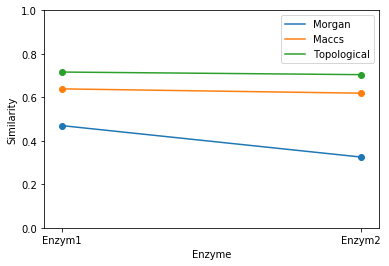

In [2]:
# Antingen plottar man bara här: Y(avgTanimoto) X(Enzym), 3st grafer - en för varje fp
# ALT tar man avg på alla avgTanimoto för alla enzym = en siffra för hela enzym klassen, och sen plottar man Y(avgEC) X(EC)

#plot

#Loopa dict och appenda keys till en list för att sätta namn på x-axis

x = range(len(dd))
xticks = []
morgan = []
maccs = []
topological = []
for keys, values in dd.items():
    xticks.append(keys)
    morgan.append(values[0])
    maccs.append(values[1])
    topological.append(values[2])

plt.ylabel ('Similarity')
plt.xlabel ('Enzyme')
plt.xticks (x,xticks)
axes = plt.gca()
axes.set_ylim([0,1])
plt.scatter (x,morgan)
plt.plot (x,morgan, label = 'Morgan')
plt.scatter (x,maccs)
plt.plot (x,maccs, label = 'Maccs')
plt.scatter (x,topological)
plt.plot (x,topological, label = 'Topological')
pylab.legend(loc = 'upper right')

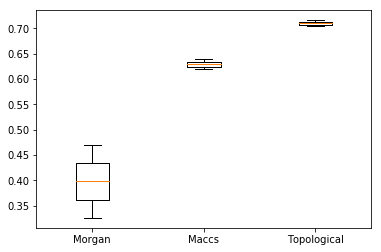

In [3]:
## Box plot

#d = {'a': [0.9,0.2,0.3], 'b': [0.2,0.6,0.9], 'c': [0.8,0.4,0.6]} #till exemepl

morganbox = []
maccsbox = []
topologicalbox = []
for key in dd:
    morganbox.append(dd[key][0])
    maccsbox.append(dd[key][1])
    topologicalbox.append(dd[key][2])

data = [morganbox,maccsbox,topologicalbox]

# Multiple box plots on one Axes
fig, ax = plt.subplots()

ax.boxplot(data)
xticks = ['Morgan', 'Maccs', 'Topological']
plt.xticks ([1,2,3],xticks)
plt.show()